In [1]:
import math
from dataclasses import dataclass

@dataclass
class Point:
    x: float
    y: float
    
    def angle_with(self, other_point):
        """
        Calculate the angle between two points.

        Parameters:
            other_point (Point): The other point to calculate the angle with.

        Returns:
            float: The angle in radians.
        """
        dx = other_point.x - self.x
        dy = other_point.y - self.y
        return math.atan2(dy, dx)

# Example usage:
point1 = Point(0, 0)
point2 = Point(0, -1)
angle = point1.angle_with(point2)
print("Angle between point1 and point2:", angle)

Angle between point1 and point2: -1.5707963267948966


In [34]:
from test_data_generator import generate_fake_metro, plot_metro_layout


flow_paths, stations, df = generate_fake_metro(
    station_count=10,
    flow_path_count=10,
    max_flow_path_length=5,
    min_flow_path_frequency=1,
    max_flow_path_frequency=10
)

In [35]:
flow_paths

[(7, ['Root', 'D', 'G']),
 (9, ['Root', 'D', 'G']),
 (4, ['Root', 'J']),
 (10, ['Root', 'D', 'G']),
 (6, ['Root', 'D']),
 (10, ['Root', 'D']),
 (8, ['Root', 'H']),
 (3, ['Root', 'D', 'G']),
 (4, ['Root', 'H']),
 (2, ['Root', 'J'])]

<module 'matplotlib.pyplot' from 'c:\\Users\\20193216\\.conda\\envs\\Serpentine\\lib\\site-packages\\matplotlib\\pyplot.py'>

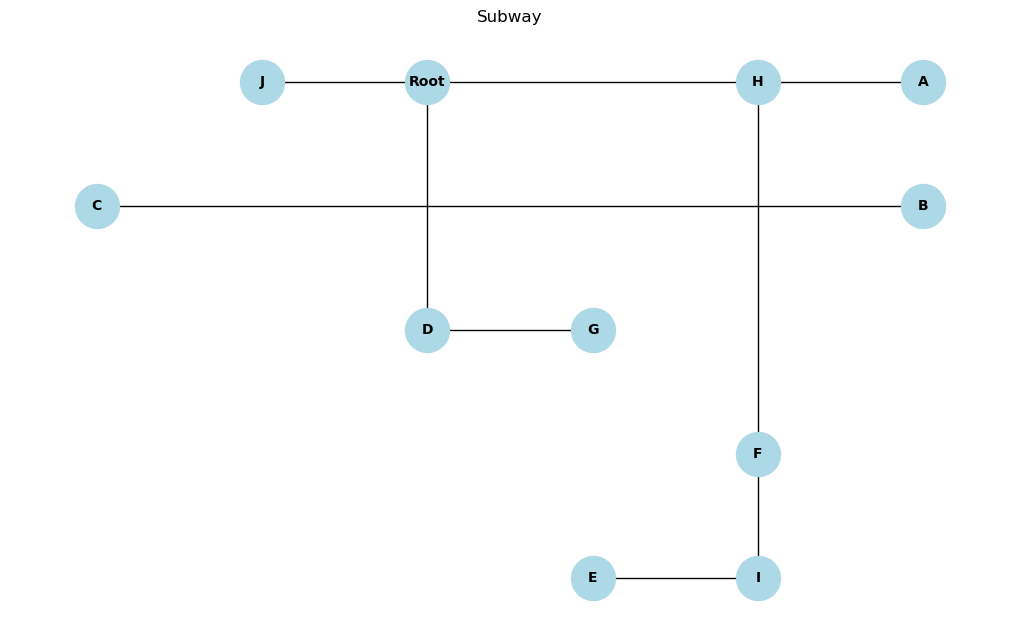

In [36]:
from test_data_generator import plot_metro_layout

plot_metro_layout(df)

In [57]:
import importlib
import algo
importlib.reload(algo)

from algo import DummyAlgorithm, DirectionalAlg
from utils import LayoutAlgorithm, FlowPathsT, Point, LayoutOutput

algorithms: [LayoutAlgorithm] = [
    DummyAlgorithm(),
    DirectionalAlg()
]

algorithms[1].find_optimal_layout(flow_paths=flow_paths, stations=stations)

Angle 3.141592653589793 for key RootJ is between 0.5*pi and pi
Angle -1.1071487177940904 for key RootDG is between 0 and -0.5*pi
Angle -1.5707963267948966 for key RootD is between 0 and -0.5*pi


[[3.141592653589793], [], [-1.1071487177940904, -1.5707963267948966], []]

In [56]:
data = {('Root', 'S0'): Point(x=20, y=40),
 ('Root', 'S1'): Point(x=21, y=41),
 ('Root', 'S2'): Point(x=21, y=39),
 ('Root', 'S3'): Point(x=19, y=41),
 ('A', 'S0'): Point(x=50, y=40),}

max_y_pair_neg_x = max(data.items(), key=lambda item: item[1].y if item[1].x < 0 else float("-inf"))
# min_y_pair_neg_x = min(data.items(), key=lambda item: item[1][1] if item[1][0] < 0 else float("-inf"))
# max_y_pair_pos_x = max(data.items(), key=lambda item: item[1][1] if item[1][0] > 0 else float("-inf"))
# min_y_pair_pos_x = min(data.items(), key=lambda item: item[1][1] if item[1][0] > 0 else float("-inf"))
# value = data.pop(max_y_pair_pos_x[0])
max_y_pair_neg_x

(('Root', 'S0'), Point(x=20, y=40))

In [48]:
value

(1, 1)

In [49]:
data

{'S0': (0, 0), 'S2': (1, -1), 'S3': (-1, 1), 's11': (-1, 10)}